In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(1137, 12)

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1192,Female,31,0,0,No,Govt_job,Rural,70.66,27.2,never smoked,0
1,77,Female,13,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,59200,Male,18,0,0,No,Private,Urban,60.56,33.0,never smoked,0
3,24905,Female,65,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
4,24257,Male,4,0,0,No,children,Rural,90.42,16.2,Unknown,0


In [5]:
target = 'stroke'
features = [
    'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
    'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
    'smoking_status',
]

In [6]:
data.groupby(target).agg(
    unique_ids=('id', 'nunique')
)

,unique_ids
stroke,
0,1000
1,137


In [7]:
features_string = ' + '.join(features)
formula = f'{target} ~ {features_string}'
formula

'stroke ~ gender + age + hypertension + heart_disease + ever_married + work_type + Residence_type + avg_glucose_level + bmi + smoking_status'

In [8]:
reg = smf.logit(formula, data).fit()
reg.summary()

/home/nick/miniconda3/envs/primary/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/nick/miniconda3/envs/primary/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

ValueError: could not convert string to float: 'Female'

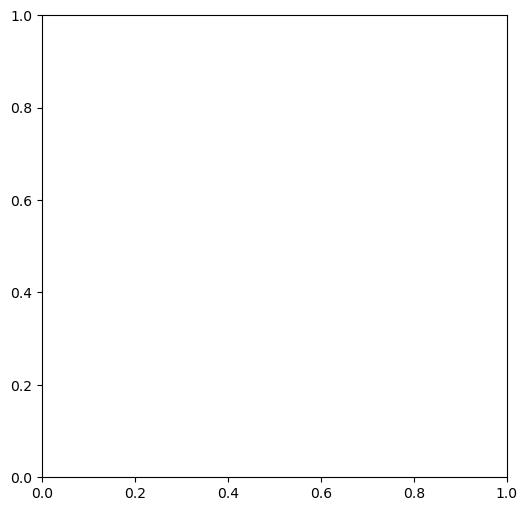

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.heatmap(
    data[features].corr(),
    vmin=-1,
    vmax=1.0,
    cmap='coolwarm',
)

plt.show()

In [ ]:
data = pd.read_csv('train.csv')

string_columns = [
    'gender',
    'ever_married', 
    'work_type', 
    'Residence_type',
    'smoking_status',
]

for string_column in string_columns:
    data = pd.concat([data, pd.get_dummies(data[string_column], drop_first=True, prefix=string_column).astype(int)], axis=1)
    data = data.drop(columns=string_column)

data['age'] = data['age'].str.replace('*', '').astype(int)

In [10]:
target = 'stroke'
features = [
    'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
    'bmi', 'gender_Male', 'gender_Other', 'ever_married_Yes',
    'work_type_Never_worked', 'work_type_Private',
    'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
    'smoking_status_formerly smoked', 'smoking_status_never smoked',
    'smoking_status_smokes'
]

KeyError: "['gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'] not in index"

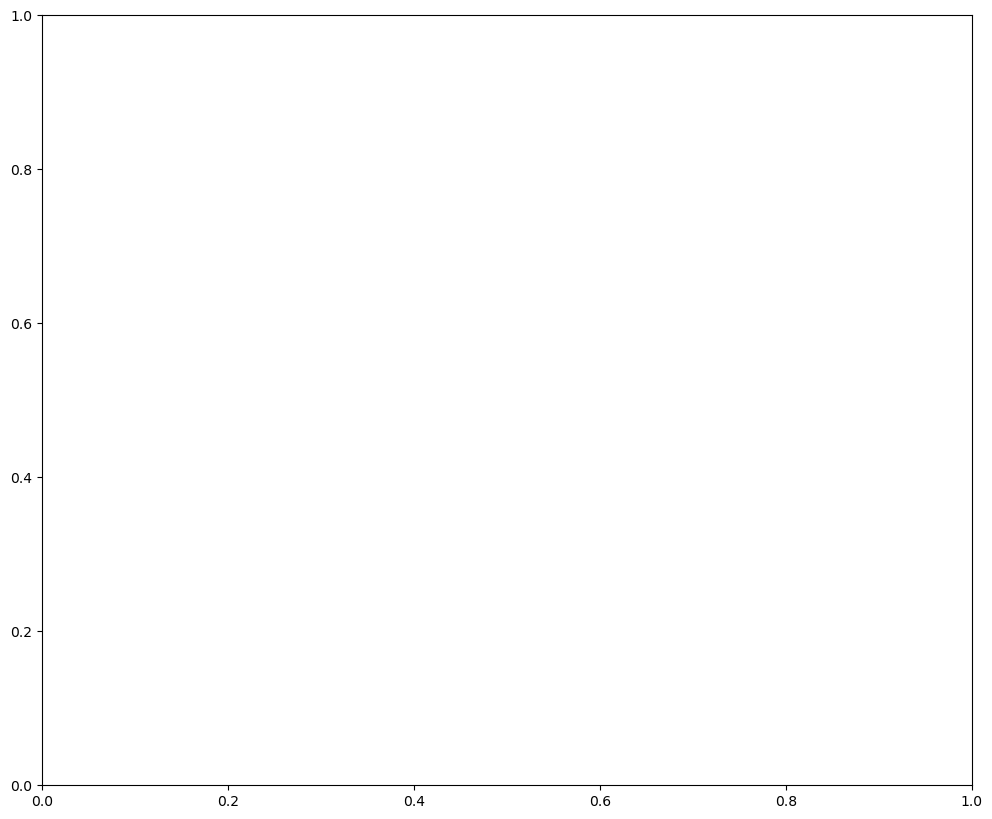

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

sns.heatmap(
    data[features].corr(),
    vmin=-1,
    vmax=1.0,
    cmap='coolwarm',
    annot=True,
)

plt.show()

In [ ]:
data[features].dtypes

In [12]:
features_string = ' + '.join(features)
formula = f'{target} ~ {features_string}'
formula

'stroke ~ age + hypertension + heart_disease + avg_glucose_level + bmi + gender_Male + gender_Other + ever_married_Yes + work_type_Never_worked + work_type_Private + work_type_Self-employed + work_type_children + Residence_type_Urban + smoking_status_formerly smoked + smoking_status_never smoked + smoking_status_smokes'

In [13]:
reg = smf.logit(formula, data).fit()
reg.summary()

SyntaxError: invalid syntax (<unknown>, line 1)

In [14]:
data = pd.read_csv('train.csv')

string_columns = [
    'gender',
    'ever_married', 
    'work_type', 
    'Residence_type',
    'smoking_status',
]

for string_column in string_columns:
    data = pd.concat([data, pd.get_dummies(data[string_column], drop_first=True, prefix=string_column).astype(int)], axis=1)
    data = data.drop(columns=string_column)

data['age'] = data['age'].str.replace('*', '').astype(int)
data.columns = [val.replace(' ', '_').replace('-', '_') for val in data.columns]

In [15]:
target = 'stroke'
features = [
    'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'gender_Male', 'gender_Other', 'ever_married_Yes',
    'work_type_Never_worked', 'work_type_Private',
    'work_type_Self_employed', 'work_type_children', 'Residence_type_Urban',
    'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
    'smoking_status_smokes'
]

In [16]:
features_string = ' + '.join(features)
formula = f'{target} ~ {features_string}'
formula

'stroke ~ age + hypertension + heart_disease + avg_glucose_level + gender_Male + gender_Other + ever_married_Yes + work_type_Never_worked + work_type_Private + work_type_Self_employed + work_type_children + Residence_type_Urban + smoking_status_formerly_smoked + smoking_status_never_smoked + smoking_status_smokes'

In [17]:
reg = smf.logit(formula, data).fit(maxiter=100)
reg.summary()

         Current function value: inf
         Iterations: 100


/home/nick/miniconda3/envs/primary/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/nick/miniconda3/envs/primary/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

In [18]:
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,1192,31,0,0,70.66,27.2,0,0,0,0,0,0,0,0,0,0,1,0
1,77,13,0,0,85.81,18.6,0,0,0,0,0,0,0,1,0,0,0,0
2,59200,18,0,0,60.56,33.0,0,1,0,0,0,1,0,0,1,0,1,0
3,24905,65,0,0,205.77,46.0,1,0,0,1,0,1,0,0,1,1,0,0
4,24257,4,0,0,90.42,16.2,0,1,0,0,0,0,0,1,0,0,0,0


In [19]:
target = 'stroke'
features = [
    'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
    'gender_Male', 'gender_Other', 'ever_married_Yes',
    'work_type_Never_worked', 'work_type_Private',
    'work_type_Self_employed', 'work_type_children', 'Residence_type_Urban',
    'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
    'smoking_status_smokes'
]

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data[features], 
    data[target], 
    test_size=0.25, 
    random_state=42,
    stratify=data[target],
)

In [22]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [23]:
clf.score(X_train, y_train)

0.8791079812206573

In [24]:
clf.score(X_test, y_test)

0.8807017543859649

#### Gridsearch

In [25]:
base_clf = SVC(random_state=42)

params = {
    'C': [0.5, 1.0, 2.0],
    'kernel': ['linear', 'rbf', 'sigmoid'],
}
GS = GridSearchCV(base_clf, params, n_jobs=-1)
GS.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 2.0],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [26]:
GS.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [27]:
best_clf = GS.best_estimator_

In [28]:
best_clf.score(X_train, y_train)

0.8791079812206573

In [29]:
best_clf.score(X_test, y_test)

0.8807017543859649

In [30]:
import joblib

In [31]:
# write model to disk
with open('best_SVC.model', 'wb') as fout:
    joblib.dump(best_clf, fout)

In [32]:
# read model from disk
with open('best_SVC.model', 'rb') as fin:
    read_model = joblib.load(fin)

In [33]:
read_model.score(X_test, y_test)

0.8807017543859649

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

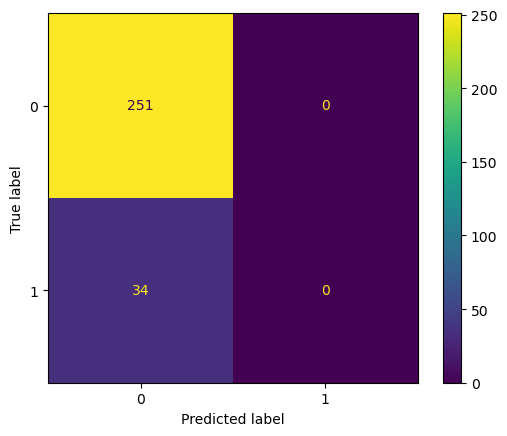

In [35]:
ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test)